In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.keras.layers import BatchNormalization
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.layers import MaxPool2D
import tensorflow.keras.utils 
from tensorflow.keras.utils import to_categorical
from keras import utils as np_utils
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from keras.utils.vis_utils import model_to_dot
from keras.utils import np_utils
import seaborn as sn
import matplotlib.pyplot as plt
from keras import backend as K

In [4]:
pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import visualkeras

In [6]:
## Important functions 

## -------------------------------------------------------------------- ##

def F1_Score(y_true, y_pred): 
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
  predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
  precision = true_positives / (predicted_positives + K.epsilon())
  recall = true_positives / (possible_positives + K.epsilon())
  f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
  return f1_val

## -------------------------------------------------------------------- ##
def preprocessing(raw, num_classes, im_rows, im_columns):
  out_y = tensorflow.keras.utils.to_categorical(raw.label, num_classes)
  num_images = raw.shape[0]
  x_as_array = raw.values[:,1:]
  x_reshaped = x_as_array.reshape(num_images, im_rows, im_columns, 1)
  normalized_x = x_reshaped / 255

  return normalized_x, out_y

In [7]:
train_file = '/content/drive/MyDrive/Neural Networks & Deep Learning/FashionMNIST/fashion-mnist_train.csv'
test_file = '/content/drive/MyDrive/Neural Networks & Deep Learning/FashionMNIST/fashion-mnist_test.csv'
train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

In [8]:
num_classes = 10
im_rows = 28
im_columns = 28

In [9]:
x_train, y_train = preprocessing(train_data, 10, 28, 28)

In [17]:
def MakeModel():
  model = Sequential()
  model.add( Conv2D(filters= 64, kernel_size=(5,5), padding='Same',activation='relu', input_shape=(28,28,1)) )
  model.add(BatchNormalization())
  
  model.add( Conv2D(filters= 64, kernel_size=(4,4), padding='Same',activation='relu') )
  model.add(BatchNormalization())
  
  model.add( MaxPool2D(pool_size=(3,3)) )
  model.add(Dropout(0.4))

  model.add( Conv2D(filters=128, kernel_size=(4,4), padding='Same',activation='relu') )
  model.add(BatchNormalization())
  model.add( Conv2D(filters=128, kernel_size=(3,3), padding='Same',activation='relu') )
  model.add(BatchNormalization())
  model.add( MaxPool2D(pool_size=(2,2)) )
  model.add(Dropout(0.4))
  
  model.add( Conv2D(filters=256, kernel_size=(4,4), padding='Same',activation='relu') )
  model.add(BatchNormalization())
  model.add( Conv2D(filters=512, kernel_size=(3,3), padding='Same',activation='relu') )
  model.add(BatchNormalization())
  model.add( MaxPool2D(pool_size=(2,2)) )
  model.add(Dropout(0.4))

  model.add( Conv2D(filters=512, kernel_size=(4,4), padding='Same',activation='relu') )
  model.add(BatchNormalization())
  model.add( Conv2D(filters=1024, kernel_size=(3,3), padding='Same',activation='relu') )
  model.add(BatchNormalization())
  model.add( MaxPool2D(pool_size=(2,2)) )
  model.add(Dropout(0.4))

  
  model.add(Flatten())
  
  model.add(Dense(2048,activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(num_classes,activation='softmax'))
  
  model.summary()
  return model

In [18]:
model = MakeModel()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 64)        1664      
_________________________________________________________________
module_wrapper_13 (ModuleWra (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 64)        65600     
_________________________________________________________________
module_wrapper_14 (ModuleWra (None, 28, 28, 64)        256       
_________________________________________________________________
module_wrapper_15 (ModuleWra (None, 9, 9, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 9, 9, 128)        

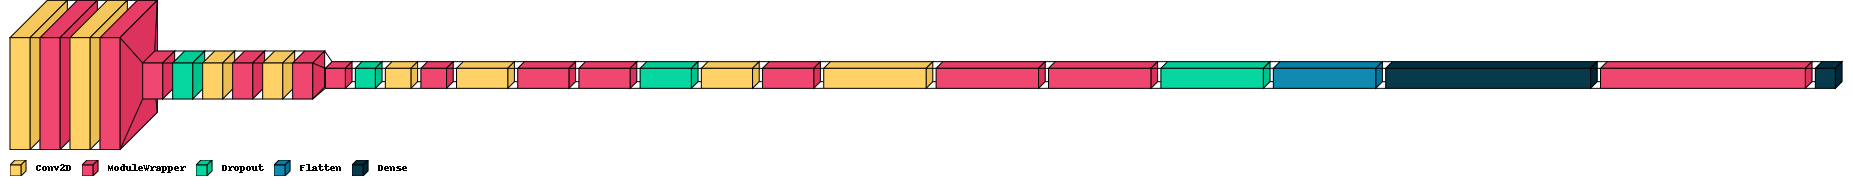

In [19]:
visualkeras.layered_view(model, to_file='output.png', legend = True)

In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',F1_Score])

In [21]:
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_split=0.25)

Epoch 1/50
704/704 [==============================] - 29s 39ms/step - loss: 0.6104 - accuracy: 0.7830 - F1_Score: 0.7809 - val_loss: 0.4680 - val_accuracy: 0.8403 - val_F1_Score: 0.8417
Epoch 2/50
704/704 [==============================] - 23s 33ms/step - loss: 0.3799 - accuracy: 0.8643 - F1_Score: 0.8644 - val_loss: 0.3758 - val_accuracy: 0.8817 - val_F1_Score: 0.8836
Epoch 3/50
704/704 [==============================] - 22s 32ms/step - loss: 0.3241 - accuracy: 0.8848 - F1_Score: 0.8854 - val_loss: 0.3404 - val_accuracy: 0.8845 - val_F1_Score: 0.8856
Epoch 4/50
704/704 [==============================] - 22s 32ms/step - loss: 0.3018 - accuracy: 0.8914 - F1_Score: 0.8921 - val_loss: 0.2852 - val_accuracy: 0.8954 - val_F1_Score: 0.8955
Epoch 5/50
704/704 [==============================] - 22s 32ms/step - loss: 0.2706 - accuracy: 0.9022 - F1_Score: 0.9033 - val_loss: 0.2504 - val_accuracy: 0.9148 - val_F1_Score: 0.9146
Epoch 6/50
704/704 [==============================] - 23s 32ms/step - 

<Figure size 400x240 with 0 Axes>

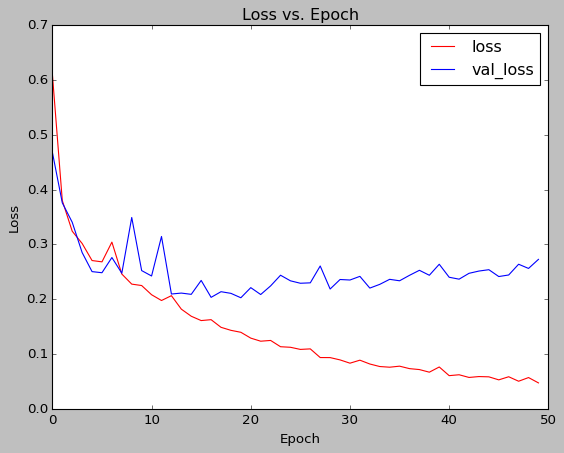

<Figure size 400x240 with 0 Axes>

In [22]:
plt.style.use('classic')
plt.plot(history.history['loss'],'red')
plt.plot(history.history['val_loss'],'blue')
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'])
plt.figure(figsize=(5,3)) 

<Figure size 400x240 with 0 Axes>

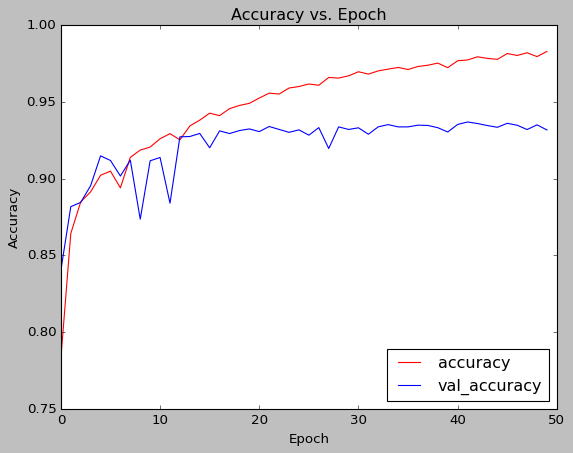

<Figure size 400x240 with 0 Axes>

In [23]:
plt.style.use('classic')
plt.plot(history.history['accuracy'],'red')
plt.plot(history.history['val_accuracy'],'blue')
plt.title('Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')

plt.figure(figsize=(5,3)) 

<Figure size 400x240 with 0 Axes>

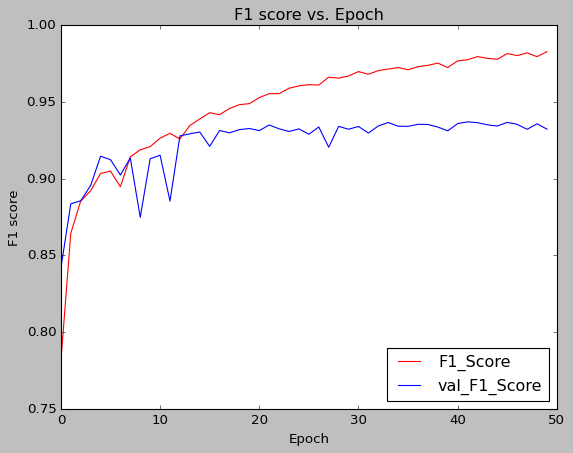

<Figure size 400x240 with 0 Axes>

In [24]:
plt.style.use('classic')
plt.plot(history.history['F1_Score'],'red')
plt.plot(history.history['val_F1_Score'],'blue')
plt.title('F1 score vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('F1 score')
plt.legend(['F1_Score', 'val_F1_Score'], loc = 'lower right')
plt.figure(figsize=(5,3)) 

In [25]:
x_test, y_test = preprocessing(test_data, 10, 28, 28)

In [26]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.25137239694595337
Test accuracy: 0.9340000152587891


In [27]:
#get the predictions for the test data
predicted_classes = model.predict_classes(x_test)
#get the indices to be plotted
y_true = np.array(test_data.iloc[:, 0])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:454: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [28]:
accurate_pred = np.nonzero(predicted_classes == y_true)[0]
non_accurate_pred = np.nonzero(predicted_classes != y_true)[0]

In [29]:
print(classification_report(predicted_classes, y_true))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       930
           1       0.99      0.99      0.99      1003
           2       0.84      0.94      0.89       899
           3       0.95      0.94      0.95      1021
           4       0.94      0.85      0.90      1105
           5       0.99      0.99      0.99       997
           6       0.82      0.79      0.81      1042
           7       0.97      0.97      0.97      1007
           8       0.99      0.99      0.99       998
           9       0.97      0.98      0.98       998

    accuracy                           0.93     10000
   macro avg       0.93      0.94      0.93     10000
weighted avg       0.94      0.93      0.93     10000



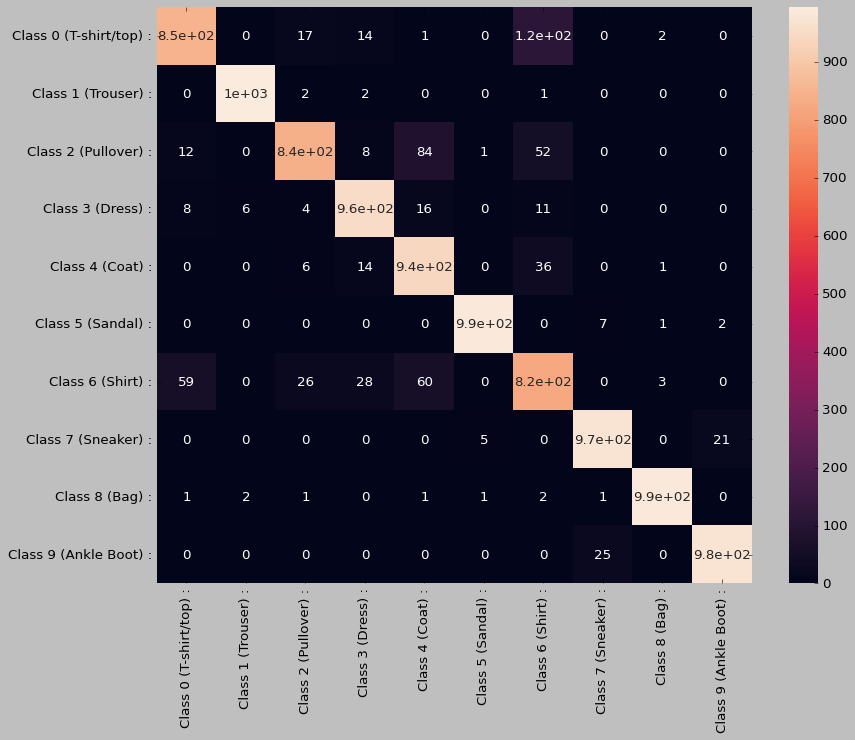

In [30]:
labels = {0 : "T-shirt/top", 
          1: "Trouser", 
          2: "Pullover", 
          3: "Dress", 
          4: "Coat",
          5: "Sandal", 
          6: "Shirt", 
          7: "Sneaker", 
          8: "Bag", 
          9: "Ankle Boot"}
target_names = ["Class {} ({}) :".format(i,labels[i]) for i in range(num_classes)]
cf = confusion_matrix(np.array(y_true), predicted_classes)
df_cm = pd.DataFrame(cf, index = [i for i in target_names],
                  columns = [i for i in target_names])
plt.figure(figsize = (12,9))
sn.heatmap(df_cm, annot=True)